In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns

import sys
sys.path.insert(1,'../code')
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
sys.path.insert(1,'../code')
sys.path.insert(1,'../data')
from params import args_welfare

from sklearn.model_selection import train_test_split
from models import model
from calculate import wte


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("../data/clean_welfare.csv")


In [3]:
df.shape

(20783, 25)

In [4]:
len(args_welfare['x'])

22

In [5]:
# inputs                                                                        
y = 'y'
d = 'w'
x = args_welfare['x']

In [6]:

# set parameters                                                                
K = 3; split = 1
alpha_range = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]


# vary N

In [7]:
#vary N
varyN = {0:5000, 1:10000, 2:15000, 3:20000}
wte_est = {0:{}, 1:{}, 2:{}, 3:{}}; wte_std = {0:{}, 1:{}, 2:{}, 3:{}}; test = {}


# get WtE and HTE
wte_varyN = {}
df_hte = {}
for i in range(0,4):
    print("loop", i)
    _df = df.sample(n=varyN[i], random_state=123, replace=False)
    model_mu = model(); model_mu.model_class = 'scikit_rf'
    args_mu = args_welfare['rf']; args_p = None
    models = {}
    models['model1_h'] = model(); models['model1_h'].model_class = 'scikit_rf'
    models['model0_h'] = model(); models['model0_h'].model_class = 'scikit_rf'
    models['model1'] = model(); models['model1'].model_class = 'scikit_rf'
    models['model0'] = model(); models['model0'].model_class = 'scikit_rf'
    models['model_p'] = None ;
    args = {'args_mu' : args_welfare['rf'], 'args_p': None}
    wte_varyN[i] = wte(_df,y,d,x,alpha_range,K=3,split=1,models = models,
                       args = args, pos=0, randomized = True)

    train,test = train_test_split(_df, test_size=.33, random_state=42)
    model1 = models['model1']; model0 = models['model0'];
    model1.train(train[train[d]==1],x,y, args=args['args_mu'])
    model0.train(train[train[d]==0],x,y, args=args['args_mu'])
    mu1 = model1.predict(test); mu0 = model0.predict(test)
    test['hte'] = mu1 - mu0
    df_hte[i] = test

loop 0
split:  1
[0.02907425 0.12936528 0.08241203 ... 0.00623713 0.17634438 0.03727467] [0.46084556 0.57634899 0.65134377 ... 0.40684017 0.44886465 0.36418459]
mu trained and predicted
alpha: 0.1 te : -0.08095697342038469 , score 1: 0.010314473197107729 , score0: 0.003383542722251631
alpha: 0.2 te : -0.1344136616848786 , score 1: 0.0011437657674120275 , score0: 0.016886603994273067
alpha: 0.3 te : -0.17135691685182325 , score 1: -0.009362813619054505 , score0: 0.015601044752239467
alpha: 0.4 te : -0.20156758822866033 , score 1: -0.013540493910329224 , score0: -0.007689740529525756
alpha: 0.5 te : -0.22821249806826802 , score 1: -0.01400467706518956 , score0: 0.00793258920625603
alpha: 0.6 te : -0.2520478716210762 , score 1: -0.009272829610931097 , score0: 0.00397723065595551
alpha: 0.7 te : -0.27457314886752227 , score 1: -0.006091385725270811 , score0: -0.009641660728870379
alpha: 0.8 te : -0.2966374704144858 , score 1: -0.0002732657873528464 , score0: -0.022242092139624713
alpha: 0.

<ipython-input-7-6ac9dabb6093>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


loop 1
split:  1
[0.04619984 0.17235535 0.11697693 ... 0.07763639 0.11663183 0.02146045] [0.43328443 0.53948868 0.62309435 ... 0.37135268 0.34907539 0.43003704]
mu trained and predicted
alpha: 0.1 te : -0.10943167593718048 , score 1: -0.030908943281870393 , score0: 0.0065472829774097
alpha: 0.2 te : -0.1603898406142334 , score 1: -0.015459502763403717 , score0: -0.012727109086435142
alpha: 0.3 te : -0.19374958111915788 , score 1: -0.014339768415344895 , score0: -0.010908281872456575
alpha: 0.4 te : -0.2194510086241727 , score 1: -0.011893873027549708 , score0: -0.007882970443248065
alpha: 0.5 te : -0.24169293346331794 , score 1: -0.005438377407781642 , score0: -0.01902505263028461
alpha: 0.6 te : -0.26209685203643857 , score 1: -0.0028456445328135186 , score0: -0.01060414316552622
alpha: 0.7 te : -0.2818507549036399 , score 1: 0.006814180840006825 , score0: -0.021214708865805138
alpha: 0.8 te : -0.3016223462105666 , score 1: 0.007156523666769781 , score0: -0.023058397722405952
alpha: 0

<ipython-input-7-6ac9dabb6093>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


loop 2
split:  1
[0.049793   0.18332208 0.1205461  ... 0.06242923 0.03026905 0.05667597] [0.41500983 0.53389723 0.61907313 ... 0.22084004 0.41298355 0.56186605]
mu trained and predicted
alpha: 0.1 te : -0.11504471914818167 , score 1: -0.01819989178084651 , score0: 0.047551012058766134
alpha: 0.2 te : -0.16486501083788574 , score 1: -0.01694864272070451 , score0: 0.04304256930938839
alpha: 0.3 te : -0.19530977455771498 , score 1: -0.011069721083486524 , score0: 0.02829132876966381
alpha: 0.4 te : -0.21879222453227654 , score 1: -0.005479058283814 , score0: 0.012558762645798034
alpha: 0.5 te : -0.23912464419865184 , score 1: -0.007788580569656147 , score0: 0.014920352948446472
alpha: 0.6 te : -0.2588473744390236 , score 1: -0.010596910394086124 , score0: 0.010171405245393925
alpha: 0.7 te : -0.2780849604496339 , score 1: -0.005913462565866354 , score0: 0.005098482339215421
alpha: 0.8 te : -0.2973666570516958 , score 1: 0.0004059602635439167 , score0: -0.0037577426863799786
alpha: 0.9 te 

<ipython-input-7-6ac9dabb6093>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


loop 3
split:  1
[0.05662574 0.11591764 0.17636999 ... 0.1084773  0.15419247 0.04086654] [0.41656913 0.54859938 0.59485483 ... 0.53153768 0.52100217 0.46386379]
mu trained and predicted
alpha: 0.1 te : -0.11571989140394444 , score 1: -0.02860638264532596 , score0: 0.030719769549711947
alpha: 0.2 te : -0.16285713689474288 , score 1: -0.01438219386991213 , score0: 0.03711297726195303
alpha: 0.3 te : -0.1920343069358429 , score 1: -0.015174726814218732 , score0: 0.022261390245436972
alpha: 0.4 te : -0.2149553493932871 , score 1: -0.009515366743737383 , score0: 0.020367302848457988
alpha: 0.5 te : -0.2349306315027463 , score 1: -0.010562042064350892 , score0: 0.019300033081074044
alpha: 0.6 te : -0.2543103115027592 , score 1: -0.012981367746990567 , score0: 0.01424812235069576
alpha: 0.7 te : -0.2734053070199015 , score 1: -0.01126714661242134 , score0: 0.006449747215144758
alpha: 0.8 te : -0.29224407853348217 , score 1: -0.00520145922491304 , score0: -0.0005714309729022623
alpha: 0.9 te :

<ipython-input-7-6ac9dabb6093>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


In [8]:
# rearrange wte results
wte_df = pd.DataFrame(data = {'alpha':alpha_range})
for i in range(4):
    wte_df['est_'+str(i)] = 0; wte_std['std_'+str(i)]=0
    for a in alpha_range:
        wte_df.loc[wte_df.alpha==a, 'est_'+str(i)] = (-1)*wte_varyN[i][0][a]
        wte_df.loc[wte_df.alpha==a,'std_'+str(i)] = wte_varyN[i][1][a]

wte_df = pd.wide_to_long(wte_df,stubnames=["est_","std_"],i='alpha',j='N').reset_index()
wte_df = wte_df[wte_df.alpha.isin([1.0,0.8,0.6,0.4,0.2])]
wte_df

,alpha,N,est_,std_
1,0.2,0,0.205140,0.022931
3,0.4,0,0.260873,0.016474
5,0.6,0,0.282380,0.013979
7,0.8,0,0.306193,0.012617
9,1.0,0,0.335702,0.011323
11,0.2,1,0.234700,0.016394
13,0.4,1,0.267503,0.011982
15,0.6,1,0.292315,0.010155
17,0.8,1,0.313774,0.009046
19,1.0,1,0.336293,0.008023


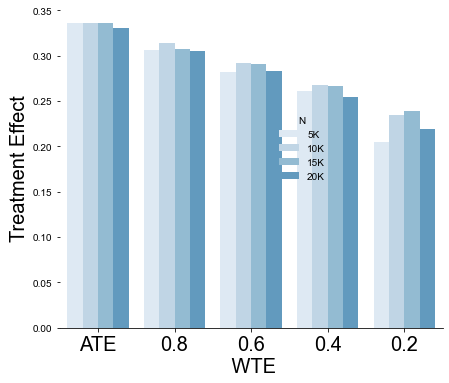

In [9]:
sns.set_palette('Blues')

g=sns.catplot(x='alpha',y='est_',hue='N',data=wte_df,kind='bar',\
              order=[1.0,0.8,0.6,0.4,0.2],size=5,aspect=1.2)
g.ax.set_xlabel(None)
g.axes[0, 0].set_ylabel("Treatment Effect",fontsize=20)
g.axes[0,0].set_xticklabels(('ATE', '0.8', '0.6\n WTE','0.4', '0.2'),ha='center')
g.axes[0,0].set_xticklabels(g.axes[0,0].get_xmajorticklabels(), fontsize = 20)
sns.set(style='whitegrid',font_scale=1.7)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.58, 0.55])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg._prop={'size': 5}
leg.set_title("N")
for t, l in zip(leg.texts,("5K", "10K", "15K","20K")):
    t.set_text(l)

sns.set_palette('Blues')


In [10]:
cov = 'educ'

df0 = df_hte[0]
df0 = df0.groupby(cov)['hte'].mean()*(-1)

df1 = df_hte[1]
df1 = df1.groupby(cov)['hte'].mean()*(-1)

df2 = df_hte[2]
df2 = df2.groupby(cov)['hte'].mean()*(-1)

df3 = df_hte[3]
df3 = df3.groupby(cov)['hte'].mean()*(-1)

_df_hte = pd.concat([df0,df1,df2,df3],axis=1,ignore_index=True).reset_index()
_df_hte = _df_hte.rename(columns={0: 'n0', 1:'n1', 2:'n2',3:'n3'})
_df_hte = pd.wide_to_long(_df_hte,stubnames='n',i=cov,j='N').reset_index()
_df_hte  = _df_hte[_df_hte.educ>=2]

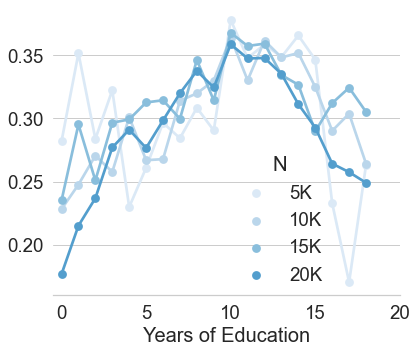

In [11]:
from matplotlib import pyplot as plt
_df_hte['educ']  = _df_hte['educ'].astype(int)
sns.set_palette('Blues')
g=sns.catplot(x=cov, y='n', hue='N', data=_df_hte,kind='point',size=5,aspect=1.2)
g.ax.set_xlabel("Years of Education", fontsize=20)
g.ax.set_xticks([0,5,10,15,20])
g.ax.set_xticklabels([0,5,10,15,20] )
g.ax.set_ylabel("",fontsize=2)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.45, .17])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg.set_title("N")
for t, l in zip(leg.texts,("5K", "10K", "15K","20K")):
    t.set_text(l)

sns.set(style='whitegrid', font_scale=1.8)

        

In [12]:
cov = 'age'

df0 = df_hte[0]
df0 = df0.groupby(cov)['hte'].mean()*(-1)

df1 = df_hte[1]
df1 = df1.groupby(cov)['hte'].mean()*(-1)

df2 = df_hte[2]
df2 = df2.groupby(cov)['hte'].mean()*(-1)

df3 = df_hte[3]
df3 = df3.groupby(cov)['hte'].mean()*(-1)

_df_hte = pd.concat([df0,df1,df2,df3],axis=1,ignore_index=True).reset_index()
_df_hte = _df_hte.rename(columns={0: 'n0', 1:'n1', 2:'n2',3:'n3'})
_df_hte = pd.wide_to_long(_df_hte,stubnames='n',i=cov,j='N').reset_index()

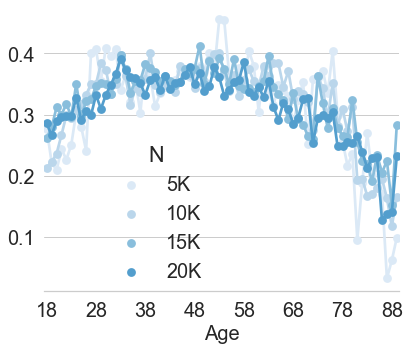

In [13]:
from matplotlib import pyplot as plt
sns.set_palette('Blues')
_df_hte['age'] = _df_hte['age'].astype(int)
g=sns.catplot(x=cov, y='n', hue='N', data=_df_hte,kind='point',size=5,aspect=1.2)
g.ax.set_xlabel("Age", fontsize=20)
g.ax.set_xticks([0,10,20,30,40,50,60,70])
g.ax.set_xticklabels([18,28,38,48,58,68,78,88] )
g.ax.set_ylabel("",fontsize=2)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.2, .17])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg.set_title("N")
for t, l in zip(leg.texts,("5K", "10K", "15K","20K")):
    t.set_text(l)

sns.set(style='whitegrid', font_scale=1.8)

# vary Model

In [15]:

df = pd.read_csv("../data/clean_welfare.csv")

# inputs                                                                        
y = 'y'
d = 'w'
x = args_welfare['x']

# set parameters                                                                
K = 3; split = 1
alpha_range = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]


#vary Model
varyModel = {'enet':'enet', 
             'rf':'scikit_rf', 
             'gb':'scikit_gb'}
wte_est = {0:{}, 1:{}, 2:{}}; wte_std = {0:{}, 1:{}, 2:{}}; test = {}
wte_varyModel = {}
df_hte = {}

# get WtE and HTE


for i in ['enet','rf','gb']:
    train, test= train_test_split(df, test_size=0.2, random_state= 524)
    #cross val and train model
    arg_mu = args_welfare[i]; model1 = model(); model0 = model()
    model1.model_class = varyModel[i]; model0.model_class = varyModel[i]
    model1.train(train[train[d]==1],x,y, args=args_welfare[i])
    model0.train(train[train[d]==0],x,y, args=args_welfare[i])
    mu1 = model1.predict(test); mu0 = model0.predict(test)
    test['hte'] = mu1 - mu0
    df_hte[i] = test
    
    models = {}
    models['model1_h'] = model(); models['model1_h'].model_class = varyModel[i]
    models['model0_h'] = model(); models['model0_h'].model_class =varyModel[i]
    models['model1'] = model(); models['model1'].model_class =varyModel[i]
    models['model0'] = model(); models['model0'].model_class =varyModel[i]
    models['model_p'] = None ;
    args = {'args_mu' : args_welfare[i], 'args_p': None}
    wte_varyModel[i] = wte(df,y,d,x,alpha_range,K=3,split=1,models = models,
                       args = args, pos=0, randomized = True)    
    


<ipython-input-15-3e1dd88b3e67>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


split:  1
[-0.00183619  0.0545503   0.03828257 ...  0.08030326  0.15580242
  0.19939363] [0.19527191 0.30847793 0.30909688 ... 0.34259235 0.45997185 0.55496488]
mu trained and predicted
alpha: 0.1 te : -0.19209950198030615 , score 1: 0.0210660176850365 , score0: 0.02775009227801494
alpha: 0.2 te : -0.21622322538389324 , score 1: 0.012305100397453245 , score0: 0.0337710409029195
alpha: 0.3 te : -0.23375690048825035 , score 1: 0.005919676199814664 , score0: 0.01783193900138891
alpha: 0.4 te : -0.2482818094024208 , score 1: -0.0028223671440525304 , score0: 0.023297006641842595
alpha: 0.5 te : -0.26110834121082765 , score 1: -0.002500622395509094 , score0: 0.01632078666619972
alpha: 0.6 te : -0.2735133693442828 , score 1: -0.005096217955048655 , score0: 0.009825478118667472
alpha: 0.7 te : -0.28566930869046964 , score 1: -0.005579155079657632 , score0: -0.0016887357377215126
alpha: 0.8 te : -0.2980467319789987 , score 1: -0.009798671863898854 , score0: 0.0006008933821906831
alpha: 0.9 te :

<ipython-input-15-3e1dd88b3e67>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


split:  1
[0.01876695 0.03250506 0.02002194 ... 0.09481427 0.12360531 0.12960545] [0.16837531 0.30522766 0.32365546 ... 0.32872492 0.50272035 0.59598837]
mu trained and predicted
alpha: 0.1 te : -0.10712143811832925 , score 1: -0.01905370069492793 , score0: 0.02992905006956369
alpha: 0.2 te : -0.15547479397920616 , score 1: -0.023058534295273204 , score0: 0.03342220338959774
alpha: 0.3 te : -0.18658302371865282 , score 1: -0.0234009495097619 , score0: 0.04324445586890333
alpha: 0.4 te : -0.21011206793484072 , score 1: -0.02171096416562823 , score0: 0.02790560848107216
alpha: 0.5 te : -0.2298265386343534 , score 1: -0.018587177021331464 , score0: 0.033720261657716064
alpha: 0.6 te : -0.24752798342140686 , score 1: -0.0168854686677891 , score0: 0.01871775087690614
alpha: 0.7 te : -0.2644029740711204 , score 1: -0.016934066114735594 , score0: 0.006090341256968259
alpha: 0.8 te : -0.2812447686301797 , score 1: -0.013766927595866715 , score0: 0.007180635654299614
alpha: 0.9 te : -0.29979605

<ipython-input-15-3e1dd88b3e67>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hte'] = mu1 - mu0


split:  1
[-0.01725669  0.00090861  0.05134891 ...  0.18561599  0.12145824
 -0.06202945] [0.10740697 0.35511025 0.1568446  ... 0.53117742 0.31590611 0.82718055]
mu trained and predicted
alpha: 0.1 te : 0.15599869165216015 , score 1: -0.19685411871592445 , score0: 0.27112136140400156
alpha: 0.2 te : 0.06501821817457755 , score 1: -0.12100472873261256 , score0: 0.2392710988679651
alpha: 0.3 te : 0.005374183190627755 , score 1: -0.08599864322540607 , score0: 0.2073114886761761
alpha: 0.4 te : -0.04382921169459772 , score 1: -0.06994275469715179 , score0: 0.18025916902684197
alpha: 0.5 te : -0.08884535175150766 , score 1: -0.057218710814453747 , score0: 0.14603383285694385
alpha: 0.6 te : -0.13215543611033856 , score 1: -0.04389871158397836 , score0: 0.11220536589134995
alpha: 0.7 te : -0.17487476578722239 , score 1: -0.03472090570068453 , score0: 0.08716727124378454
alpha: 0.8 te : -0.21848388048771836 , score 1: -0.029495776287720717 , score0: 0.060109481382763424
alpha: 0.9 te : -0.2653

In [16]:
# rearrange wte results
varyModel_df = pd.DataFrame(data = {'alpha':alpha_range})
count = 0
for i in ['enet','rf','gb']:
    varyModel_df['est_'+str(count)] = 0; varyModel_df['std_'+str(count)]=0
    for a in alpha_range:
        varyModel_df.loc[varyModel_df.alpha==a, 'est_'+str(count)] = (-1)*wte_varyModel[i][0][a]
        varyModel_df.loc[varyModel_df.alpha==a,'std_'+str(count)] = wte_varyModel[i][1][a]
    count+=1

varyModel_df = pd.wide_to_long(varyModel_df,stubnames=["est_","std_"],i='alpha',j='model').reset_index()
varyModel_df= varyModel_df[varyModel_df.alpha.isin([1.0,0.8,0.6,0.4,0.2])]
varyModel_df

,alpha,model,est_,std_
1,0.2,0,0.233194,0.010340
3,0.4,0,0.260973,0.007989
5,0.6,0,0.282256,0.006850
7,0.8,0,0.303601,0.006110
9,1.0,0,0.330608,0.005534
11,0.2,1,0.227648,0.010716
13,0.4,1,0.261268,0.008199
15,0.6,1,0.281341,0.006928
17,0.8,1,0.306302,0.006169
19,1.0,1,0.330121,0.005535


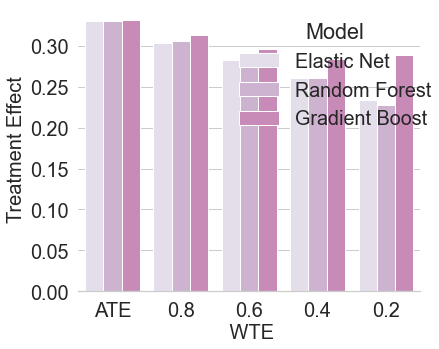

In [17]:
import seaborn as sns
sns.set_palette('PuRd')

g=sns.catplot(x='alpha',y='est_',hue='model',data=varyModel_df,kind='bar',\
              order=[1.0,0.8,0.6,0.4,0.2],size=5,aspect=1.2)
g.ax.set_xlabel(None)
g.axes[0, 0].set_ylabel("Treatment Effect",fontsize=20)
g.axes[0,0].set_xticklabels(('ATE', '0.8', '0.6\n WTE','0.4', '0.2'),ha='center')
g.axes[0,0].set_xticklabels(g.axes[0,0].get_xmajorticklabels(), fontsize = 20)
sns.set(style='whitegrid',font_scale=1.7)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.45, .59])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg._prop={'size': 3}
leg.set_title("Model")
for t, l in zip(leg.texts,("Elastic Net", "Random Forest", "Gradient Boost")):
    t.set_text(l)

#g.savefig('../figures/varyModel_WTE.eps')

In [18]:
cov = 'educ'

df0 = df_hte['enet']
df0 = df0.groupby(cov)['hte'].mean()*(-1)

df1 = df_hte['rf']
df1 = df1.groupby(cov)['hte'].mean()*(-1)

df2 = df_hte['gb']
df2 = df2.groupby(cov)['hte'].mean()*(-1)

_df_hte = pd.concat([df0,df1,df2],axis=1,ignore_index=True).reset_index()
_df_hte = _df_hte.rename(columns={0: 'n0', 1:'n1', 2:'n2',3:'n3'})
_df_hte = pd.wide_to_long(_df_hte,stubnames='n',i=cov,j='N').reset_index()
_df_hte

,educ,N,n
0,0.0,0,0.316166
1,1.0,0,0.298028
2,2.0,0,0.294425
3,3.0,0,0.324720
4,4.0,0,0.335877
...,...,...,...
58,16.0,2,0.311675
59,17.0,2,0.227249
60,18.0,2,0.351090
61,19.0,2,0.314368


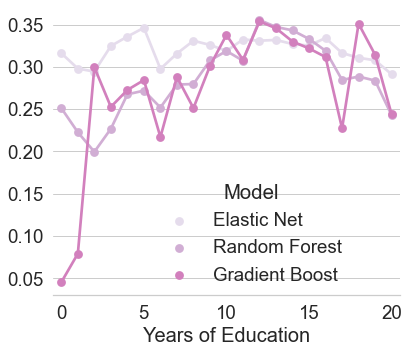

In [19]:
from matplotlib import pyplot as plt
_df_hte['educ']  = _df_hte['educ'].astype(int)
sns.set_palette('PuRd')

g=sns.catplot(x=cov, y='n', hue='N', data=_df_hte,kind='point',size=5,aspect=1.2)
g.ax.set_xlabel("Years of Education", fontsize=20)
g.ax.set_xticks([0,5,10,15,20])
g.ax.set_xticklabels([0,5,10,15,20] )

g.ax.set_ylabel("",fontsize=2)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.3, .17])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg.set_title("Model")
for t, l in zip(leg.texts,("Elastic Net", "Random Forest", "Gradient Boost")):
    t.set_text(l)

sns.set(style='whitegrid', font_scale=1.8)

        
#g.savefig('../figures/varyModel_byeduc.eps')


In [20]:
cov = 'age'

df0 = df_hte['enet']
df0 = df0.groupby(cov)['hte'].mean()*(-1)

df1 = df_hte['rf']
df1 = df1.groupby(cov)['hte'].mean()*(-1)

df2 = df_hte['gb']
df2 = df2.groupby(cov)['hte'].mean()*(-1)

_df_hte = pd.concat([df0,df1,df2],axis=1,ignore_index=True).reset_index()
_df_hte = _df_hte.rename(columns={0: 'n0', 1:'n1', 2:'n2',3:'n3'})
_df_hte = pd.wide_to_long(_df_hte,stubnames='n',i=cov,j='N').reset_index()
_df_hte

,age,N,n
0,18.0,0,0.350720
1,19.0,0,0.331330
2,20.0,0,0.326275
3,21.0,0,0.325321
4,22.0,0,0.331683
...,...,...,...
211,85.0,2,0.171919
212,86.0,2,0.370549
213,87.0,2,0.155119
214,88.0,2,-0.000930


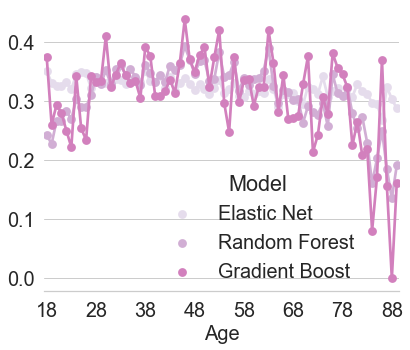

In [21]:
from matplotlib import pyplot as plt
_df_hte['age']  = _df_hte['age'].astype(int)
sns.set_palette('PuRd')

g=sns.catplot(x=cov, y='n', hue='N', data=_df_hte,kind='point',size=5,aspect=1.2)
g.ax.set_xlabel("Age", fontsize=20)
g.ax.set_xticks([0,10,20,30,40,50,60,70])
g.ax.set_xticklabels([18,28,38,48,58,68,78,88] )
g.ax.set_ylabel("",fontsize=2)
sns.despine(left=True)

leg = g._legend
leg.set_bbox_to_anchor([.3, .17])  # coordinates of lower left of bounding box
leg._loc = 3,10
leg.set_title("Model")
for t, l in zip(leg.texts,("Elastic Net", "Random Forest", "Gradient Boost")):
    t.set_text(l)

sns.set(style='whitegrid', font_scale=1.8)

        
#g.savefig('../figures/varyModel_byeduc.eps')
